# Prerequisites

## Install Library

In [1]:
# for python 3.11.4
%pip install -r requirements.txt44


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt44'
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [2]:
# Basic import
import pandas as pd
import numpy as np
import joblib
import os
import json
from datetime import datetime
import warnings

# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, ParameterSampler, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (recall_score, precision_score, f1_score, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, classification_report, roc_curve, roc_auc_score, cohen_kappa_score)
from catboost import CatBoostClassifier

# Imbalanced learning
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
warnings.filterwarnings('ignore')

## Read Data

## Data Splitting Strategy

This notebook uses a **standard 70/20/10 split** instead of time-based splitting:
- **70%** for training
- **20%** for validation (used in cross-validation)
- **10%** for final testing

This approach ensures:
- Stratified sampling maintains fraud class distribution across all sets
- Random splitting avoids temporal bias
- Better generalization for non-temporal fraud patterns
- Consistency with standard ML practices

In [3]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)

In [4]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,...,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,...,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,...,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,...,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,...,0,0,0,0,1,0,0,0,0,77.702395


In [6]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend',
       'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes',
       'diff_seconds', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance'],
      dtype='object')

In [7]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [8]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [9]:
df_all = df.copy()

# Standard 70/20/10 train/validation/test split
# First split: 70% train, 30% temp (which will be split into 20% val, 10% test)
X_temp = df_all.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud'], axis=1)
y_temp = df_all['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
)

# Second split: 20% validation, 10% test (from the 30% temp)
# 20/30 = 0.667 for validation, 10/30 = 0.333 for test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.333, random_state=42, stratify=y_temp
)

# Get corresponding dataframes for later use
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

df_train_final = df_all.loc[train_indices]
df_val = df_all.loc[val_indices]
df_test = df_all.loc[test_indices]

In [10]:
print("=== Standard 70/20/10 Split Information ===")
print(f"Training set: {len(df_train_final):,} samples ({len(df_train_final)/len(df_all)*100:.1f}%)")
print(f"Validation set: {len(df_val):,} samples ({len(df_val)/len(df_all)*100:.1f}%)")
print(f"Test set: {len(df_test):,} samples ({len(df_test)/len(df_all)*100:.1f}%)")
print(f"Total: {len(df_all):,} samples")

print("\n=== Fraud Distribution by Set ===")
print(f"Training set fraud rate: {df_train_final['is_fraud'].mean()*100:.2f}%")
print(f"Validation set fraud rate: {df_val['is_fraud'].mean()*100:.2f}%")
print(f"Test set fraud rate: {df_test['is_fraud'].mean()*100:.2f}%")
print(f"Overall fraud rate: {df_all['is_fraud'].mean()*100:.2f}%")

=== Standard 70/20/10 Split Information ===
Training set: 907,672 samples (70.0%)
Validation set: 259,465 samples (20.0%)
Test set: 129,538 samples (10.0%)
Total: 1,296,675 samples

=== Fraud Distribution by Set ===
Training set fraud rate: 0.58%
Validation set fraud rate: 0.58%
Test set fraud rate: 0.58%
Overall fraud rate: 0.58%


In [11]:
print("\n=== Original Class Distribution ===")
print(df_train_final['is_fraud'].value_counts())
print(f"Fraud percentage: {df_train_final['is_fraud'].mean()*100:.2f}%")


=== Original Class Distribution ===
is_fraud
0    902418
1      5254
Name: count, dtype: int64
Fraud percentage: 0.58%


# Model Pipeline

## 1. Features

### 1.1 Split Features and Target

In [12]:
columns_to_exclude = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud']

# Use the already split data from the previous cell
# X_train, X_val, X_test are already defined from the split
# y_train, y_val, y_test are already defined from the split

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Total samples: {len(X_train) + len(X_val) + len(X_test)}")

# Verify the splits
print(f"\nTraining set fraud rate: {y_train.mean():.4f}")
print(f"Validation set fraud rate: {y_val.mean():.4f}")
print(f"Test set fraud rate: {y_test.mean():.4f}")

Training set shape: (907672, 41)
Validation set shape: (259465, 41)
Test set shape: (129538, 41)
Total samples: 1296675

Training set fraud rate: 0.0058
Validation set fraud rate: 0.0058
Test set fraud rate: 0.0058


### 1.2 Feature Scaling

In [13]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 1.3 Feature Selection

In [14]:
# 1st: Select K Best (Find the 20 best features)
# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

Result from SelectKBest

In [15]:
# List the selected features from SelectKBest
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['amt', 'gender', 'age', 'hour', 'month', 'time_diff', 'diff_days',
       'diff_hours', 'diff_minutes', 'diff_seconds', 'category_entertainment',
       'category_food_dining', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net'],
      dtype='object')


In [16]:
# 2nd: RFE (Recursive Feature Elimination)
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)
X_train_rfe = rfe.fit_transform(X_train_selected, y_train)
X_val_rfe = rfe.transform(X_val_selected)
X_test_rfe = rfe.transform(X_test_selected)

In [17]:
# Define the model pipeline for CatBoost
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(random_state=42, verbose=False, class_weights=[1, 170]))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('select_kbest', SelectKBest(k=20)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     n_features_to_select=10)),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x124c86990>)])

## 2. CatBoost

### 2.1 Find Best Parameters

#### GridSearch

In [18]:
fraud_ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Fraud ration (normal/frauld): {fraud_ratio:.2f}")

Fraud ration (normal/frauld): 171.76


In [36]:
# Define parameter grid for CatBoost
param_grid = {
    'catboost__iterations': [100, 200],
    'catboost__learning_rate': [0.05, 0.1],
    'catboost__depth': [4, 8],
    'catboost__l2_leaf_reg': [1, 3],
    'catboost__class_weights': [[1, 172], [1, 100]]
}

# Create pipeline for GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(random_state=42, verbose=False))
])

# GridSearchCV with balanced scoring
print("Starting GridSearchCV...")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best params from GridSearch:", best_params)
print("Best GridSearch F1 Score:", grid_search.best_score_)

Starting GridSearchCV...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying t

AttributeError: 'Pipeline' object has no attribute 'transform_input'

In [20]:
# Run GridSearchCV
print("GridSearchCV completed successfully!")
print("Best params from GridSearch:", best_params)
print("Best CV F1 Score:", grid_search.best_score_)

GridSearchCV completed successfully!
Best params from GridSearch: {'catboost__class_weights': [1, 100], 'catboost__depth': 4, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
Best CV F1 Score: 0.28999667088245534


In [21]:
# Build the best pipeline with the best parameters and train with the full training set
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(
        iterations=best_params['catboost__iterations'],
        learning_rate=best_params['catboost__learning_rate'],
        depth=best_params['catboost__depth'],
        l2_leaf_reg=best_params['catboost__l2_leaf_reg'],
        class_weights=best_params['catboost__class_weights'],
        random_state=42,
        verbose=False
    ))
])

In [22]:
# Combine train and validation sets for final training
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

# Train the best pipeline on combined train+validation data
best_pipeline.fit(X_trainval, y_trainval)

print(f"Final training set shape: {X_trainval.shape}")
print(f"Final training set fraud rate: {y_trainval.mean():.4f}")

Final training set shape: (1167137, 41)
Final training set fraud rate: 0.0058


In [23]:
# --- Display GridSearch Results ---
print("Best GridSearch Parameters:", best_params)
print("Best GridSearch F1 Score:", grid_search.best_score_)

Best GridSearch Parameters: {'catboost__class_weights': [1, 100], 'catboost__depth': 4, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 3, 'catboost__learning_rate': 0.1}
Best GridSearch F1 Score: 0.28999667088245534


### 2.2 Evaluate and Compare The Results

Classification Report

In [24]:
# Evaluate on test set (CatBoost returns 0/1 directly)
y_pred = best_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    128788
           1       0.16      0.94      0.28       750

    accuracy                           0.97    129538
   macro avg       0.58      0.95      0.63    129538
weighted avg       0.99      0.97      0.98    129538



Confusion Matrix

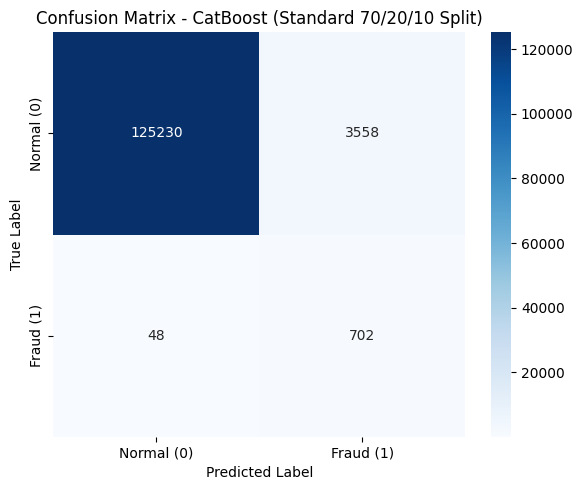

In [25]:
# Predicted values and true values for confusion matrix for GridSearch
y_true = y_test
y_pred_gridsearch = best_pipeline.predict(X_test)

# Build confusion matrix
cm_gridsearch = confusion_matrix(y_true, y_pred_gridsearch)
labels = ['Normal (0)', 'Fraud (1)']

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gridsearch, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - CatBoost (Standard 70/20/10 Split)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [26]:
metrics = {
    "Method": ["GridSearch"],
    "Precision": [precision_score(y_test, y_pred_gridsearch)],
    "Recall": [recall_score(y_test, y_pred_gridsearch)],
    "F1-Score": [f1_score(y_test, y_pred_gridsearch)],
    "ROC-AUC": [roc_auc_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])],
    "PR-AUC": [average_precision_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])],
    "Cohen Kappa": [cohen_kappa_score(y_test, y_pred_gridsearch)]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Cohen Kappa
0,GridSearch,0.164789,0.936,0.28024,0.993191,0.800397,0.273082


ROC Curve

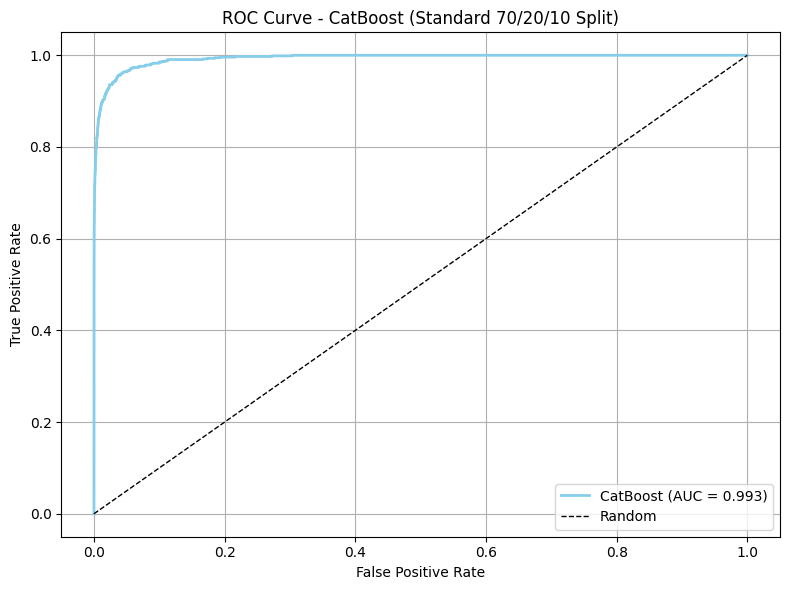

In [27]:
# --- Display ROC Curve ---
y_score = best_pipeline.predict_proba(X_test)[:, 1]

# Build ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'CatBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost (Standard 70/20/10 Split)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

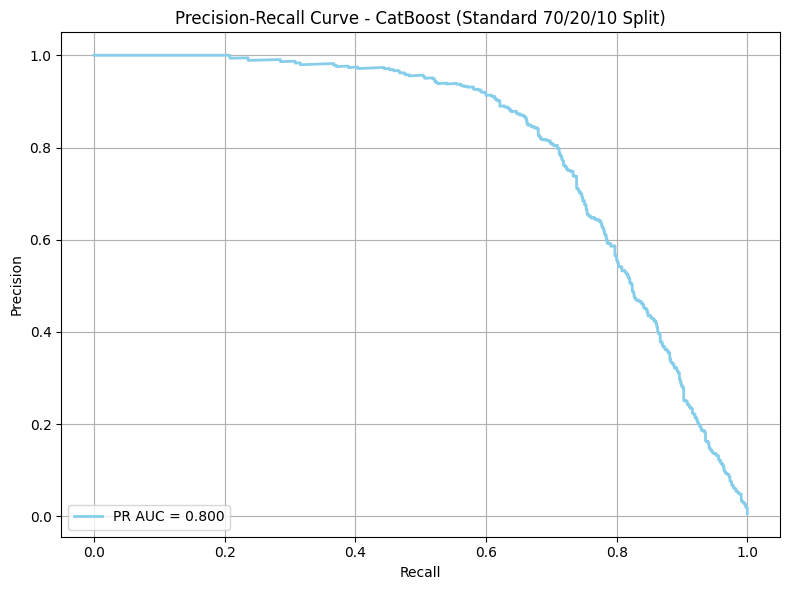

In [28]:
# --- Display Precision-Recall Curve ---
y_score = best_pipeline.predict_proba(X_test)[:, 1]

# สร้าง Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='skyblue', lw=2, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CatBoost (Standard 70/20/10 Split)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

Metrics Comparison

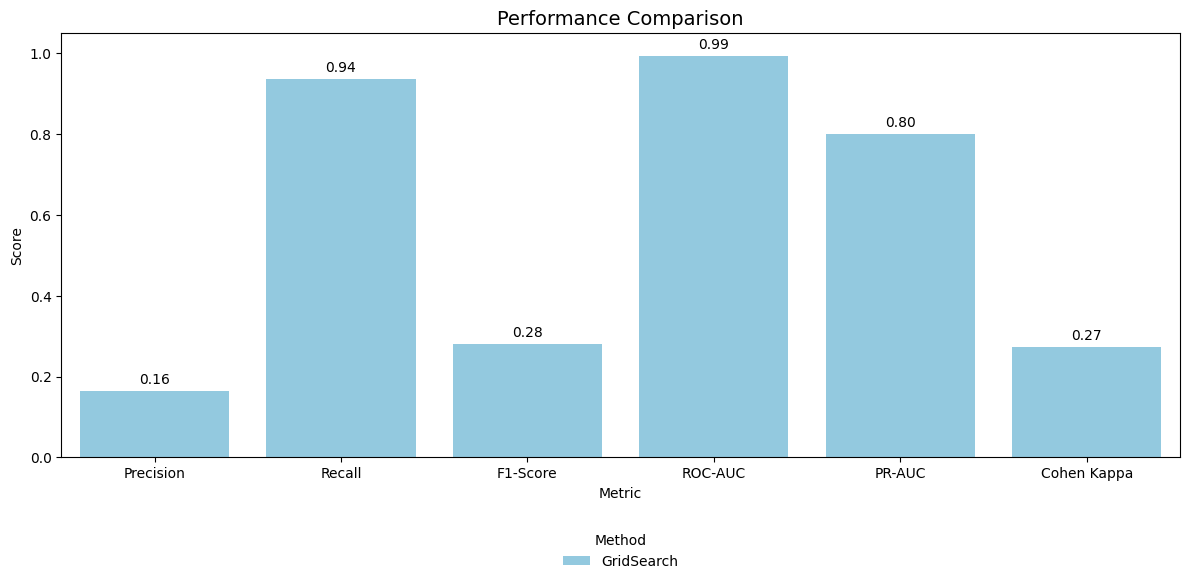

In [29]:
# --- Display Metrics Comparison ---
plt.figure(figsize=(12, 6))

df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["skyblue"])

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )

plt.title("Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

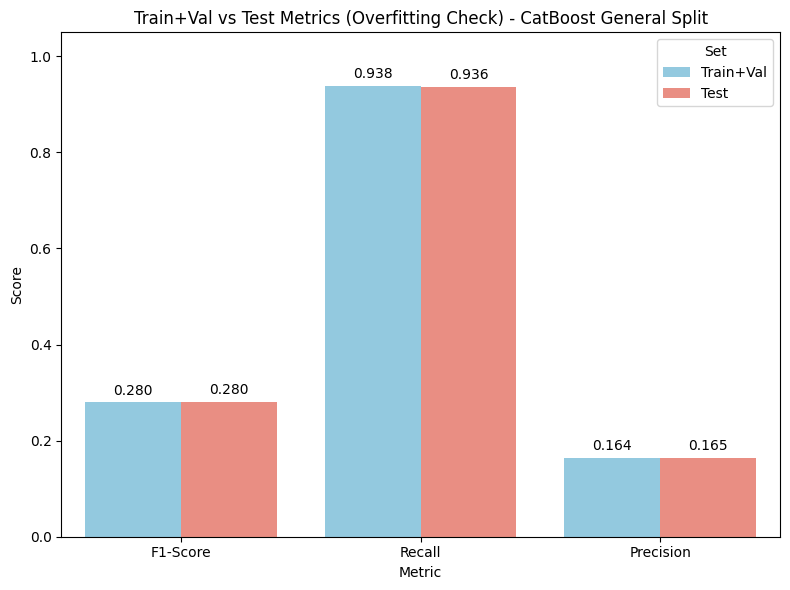

=== Overfitting Analysis ===
Train+Val F1: 0.280 vs Test F1: 0.280 (diff: 0.001)
Train+Val Recall: 0.938 vs Test Recall: 0.936 (diff: 0.002)
Train+Val Precision: 0.164 vs Test Precision: 0.165 (diff: 0.000)


In [30]:
# --- Calculate metrics for combined train+validation set ---
y_pred_trainval = best_pipeline.predict(X_trainval)
trainval_f1 = f1_score(y_trainval, y_pred_trainval)
trainval_recall = recall_score(y_trainval, y_pred_trainval)
trainval_precision = precision_score(y_trainval, y_pred_trainval)

# --- Calculate metrics for test set ---
y_pred_test = best_pipeline.predict(X_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

# --- Prepare DataFrame for plotting ---
df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Recall", "Precision"],
    "Train+Val": [trainval_f1, trainval_recall, trainval_precision],
    "Test": [test_f1, test_recall, test_precision]
})

df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")

# --- Plot ---
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.3f}',
            ha="center", va="bottom"
        )

plt.title("Train+Val vs Test Metrics (Overfitting Check) - CatBoost General Split")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.tight_layout()
plt.grid(False)
plt.show()

# Print numerical comparison
print("=== Overfitting Analysis ===")
print(f"Train+Val F1: {trainval_f1:.3f} vs Test F1: {test_f1:.3f} (diff: {abs(trainval_f1-test_f1):.3f})")
print(f"Train+Val Recall: {trainval_recall:.3f} vs Test Recall: {test_recall:.3f} (diff: {abs(trainval_recall-test_recall):.3f})")
print(f"Train+Val Precision: {trainval_precision:.3f} vs Test Precision: {test_precision:.3f} (diff: {abs(trainval_precision-test_precision):.3f})")

### 2.3 Save Model

In [31]:
# 1. Save full pipeline with all preprocessing steps
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('catboost', CatBoostClassifier(**{k.replace('catboost__', ''): v for k, v in best_params.items() if k.startswith('catboost__')}, random_state=42, verbose=False))
])

# Fit pipeline with combined train+validation data
full_pipeline.fit(X_trainval, y_trainval)

# Save the models
joblib.dump(full_pipeline, "catboost_general_split.joblib")
print("Full pipeline saved as: catboost_general_split.joblib")

# 2. Save best parameters
with open("params_CatBoost_GeneralSplit_fromGridSearch.json", "w") as f:
    json.dump(best_params, f, indent=2)
print("Best parameters saved as: params_CatBoost_GeneralSplit_fromGridSearch.json")

# 3. Save model with parameters
save_dict = {
    "pipeline": full_pipeline,
    "params": best_params,
    "split_type": "standard_70_20_10",
    "train_size": len(X_trainval),
    "test_size": len(X_test)
}
joblib.dump(save_dict, "CatBoost_GeneralSplit_with_params.joblib")
print("Model with parameters saved as: CatBoost_GeneralSplit_with_params.joblib")

Full pipeline saved as: catboost_general_split.joblib
Best parameters saved as: params_CatBoost_GeneralSplit_fromGridSearch.json
Model with parameters saved as: CatBoost_GeneralSplit_with_params.joblib


# Model Testing

In [32]:
df_test_external = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)

try:
    loaded_pipeline = joblib.load("catboost_general_split.joblib")
    print("Successfully loaded: catboost_general_split.joblib")
except FileNotFoundError:
    print("Model file not found. Please ensure the model training section has been run.")
    loaded_pipeline = joblib.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/catboost_timebased.joblib")
    print("Loaded fallback model: catboost_timebased.joblib")

Successfully loaded: catboost_general_split.joblib


In [33]:
# Random sample for testing
# sample_df = df.sample(n=50, random_state=42).copy()
sample_df = df.sample(100).copy()
X_sample = sample_df.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud'], axis=1)

In [34]:
predictions = loaded_pipeline.predict(X_sample)
predicted_result = predictions  # CatBoost returns 0/1 directly

In [35]:
# Calculate fraud probability
fraud_probability = loaded_pipeline.predict_proba(X_sample)[:, 1]

# Add predictions and fraud probability to sample_df
sample_df['predicted_result'] = predicted_result
sample_df['fraud_probability'] = fraud_probability

# Select columns to display
columns_to_show = [
    'trans_date_trans_time', 'trans_num', 'cc_num',  'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]
display(sample_df[columns_to_show].reset_index(drop=True))

,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2019-02-15 17:22:06,893b1233ca2fdf9db5d8e51160c520b5,4158945090781624,Justin,Bell,526,144.51,0,0,0.030741
1,2019-12-03 02:36:25,eb6ecb8fd38467ae98ead20d51057a7a,374125201044065,Christopher,Gilbert,676,7.31,0,0,0.428675
2,2019-05-13 07:22:06,19c795def09126601f7c88e1ab7b2eb8,4149635823017,Samuel,Farrell,4,29.50,0,0,0.002144
3,2019-04-21 13:55:36,d2aaeceae6527e241ae9ff48c75f3c17,4859525594182537,Rebecca,Farley,471,45.59,0,0,0.003228
4,2019-01-07 04:14:31,0b75db4ac411d5a273ae4d590a48ab47,3560318482131952,William,Skinner,162,84.29,0,0,0.004173
...,...,...,...,...,...,...,...,...,...,...
95,2019-02-10 15:10:27,7bfc38ca15278f36edaee69fa3a60764,30199621383748,Theresa,Powell,470,179.67,0,0,0.012705
96,2020-03-15 15:26:31,6d23d900e724928a59ebc950a64d2b3c,4198470814557,Christie,Williamson,519,70.08,0,0,0.008932
97,2019-06-03 19:08:16,718e9271d5229a26c525fbe95cdcdd81,4998109455173950,Mary,Pruitt,219,33.56,0,0,0.000590
98,2019-02-11 13:59:02,6bf169c10158ebd0360fcc9acb93f446,4642255475285942,Sabrina,Johnson,587,9.19,0,0,0.040311
